# Guide to Analysis of Time Series Data
By Dean Menezes

# Multicolinearity

Multicollinearity occurs when there is a high degree of correlation  between two or more independent variables in a regression model.

Specifically we look at the Pearson correlation coefficient, which measures the degree of linear correlation between two variables.

The Pearson correlation between two variables $X$ and $Y$ is defined as:

$$\rho_{X,Y} = \frac{{\bf E}[(X - \mu_X)(Y - \mu_Y)]}{\sigma_X\sigma_Y}$$

where $\mu_X$ and $\mu_Y$ are the means of $X$ and $Y$, and $\sigma_X$ and $\sigma_Y$ are the standard deviations of $X$ and $Y$.

In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import seaborn as sns

bp = pd.read_csv("http://math.ucla.edu/~dmenezes/bloodpress.csv")
bp.head(n=20)

,BP,Age,Weight,BSA,Dur,Pulse,Stress
0,105,47,85.4,1.75,5.1,63,33
1,115,49,94.2,2.10,3.8,70,14
2,116,49,95.3,1.98,8.2,72,10
3,117,50,94.7,2.01,5.8,73,99
4,112,51,89.4,1.89,7.0,72,95
5,121,48,99.5,2.25,9.3,71,10
6,121,49,99.8,2.25,2.5,69,42
7,110,47,90.9,1.90,6.2,66,8
8,110,49,89.2,1.83,7.1,69,62
9,114,48,92.7,2.07,5.6,64,35


The above data set lists the blood pressure data for various patients.  It shows their blood pressure in mmHg as well as age, weight, body surface area, pulse, etc.

In [ ]:
bp.corr()

,BP,Age,Weight,BSA,Dur,Pulse,Stress
BP,1.000000,0.659093,0.950068,0.865879,0.292834,0.721413,0.163901
Age,0.659093,1.000000,0.407349,0.378455,0.343792,0.618764,0.368224
Weight,0.950068,0.407349,1.000000,0.875305,0.200650,0.659340,0.034355
BSA,0.865879,0.378455,0.875305,1.000000,0.130540,0.464819,0.018446
Dur,0.292834,0.343792,0.200650,0.130540,1.000000,0.401514,0.311640
Pulse,0.721413,0.618764,0.659340,0.464819,0.401514,1.000000,0.506310
Stress,0.163901,0.368224,0.034355,0.018446,0.311640,0.506310,1.000000


<Axes: >

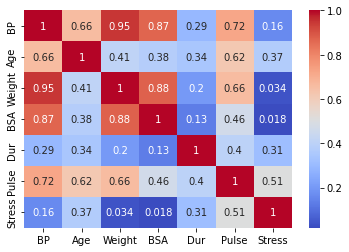

In [ ]:
sns.heatmap(bp.corr(), annot=True, cmap='coolwarm')

The correlation matrix indicates that weight and body surface area (BSA) are strongly correlated.  The pulse is also relatively highly correlated with Weight, Stress, and Age.  If we are trying to predict blood pressure based on the other factors, it might be helpful to drop some variables.  We can visualize the correlation using a heatmap.

In [ ]:
vif = pd.DataFrame()
X = bp.drop(columns=["BP"])
vif["variables"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])] # compute variance inflation factor
print(vif) # print it

  variables          VIF
0       Age   536.793041
1    Weight  3187.057943
2       BSA  1044.246904
3       Dur    12.514432
4     Pulse  1553.320340
5    Stress     5.809743


## Diagnosis

A simple way to detect multicollinearity is to examine the correlation matrix between the predictor variables. If two or more variables are highly correlated (i.e., have correlation coefficients close to 1 or -1), this indicates that they are measuring similar concepts and may be redundant in the model.

We can also use the VIF (variance inflation factor) to detect multicollinearity in the regression model. The VIF measures the extent to which each independent variable is linearly related to the other independent variables in the model.

# Damage

Multicollinearity can lead to unstable coefficient estimates: there will be larger standard errors for the coefficients. This can make it difficult to interpret the relationships between the predictor variables and the outcome variable. This can result in incorrect conclusions about the importance and significance of the variables.

It can also make it hard to interpret the model results and identify the most important variables.

# Directions

Multicollinearity issues can be addressed in several ways:

* One way is to drop one of the correlated variables
* Another way is to combine variables, either by creating another feature that captures the information by hand, or by using PCA (Principal Component Analysis).  If we use PCA, we use the eigenvalues and eigenvectors of the correlation matrix to construct a set of new variables called the principal components, which can be used in the model
* Another way is to use regularized regression (ridge regression or LASSO regression) instead of ordinary least squares.  A LASSO regression is likely to select one of the predictors and drop the other (use a zero coefficient). The ridge regression will also reduce the variance in the regression coefficients.

# Joining time series with different frequencies

Joining time series with different frequencies refers to the process of combining two or more time series datasets that have different time intervals or frequencies. This can be a challenging task because the data may not align perfectly: that is, there might be  missing or overlapping observations, which can lead to issues with data quality and accuracy.

The most common methods used to join time series data with different frequencies are:

* **Upsampling**: This involves increasing the frequency of the lower-frequency data to match the higher-frequency data by inserting missing values.
* **Downsampling**: This involves decreasing the frequency of the higher-frequency data to match the lower-frequency data by aggregating the higher-frequency data to the lower-frequency period.
* **Interpolation**: This involves using statistical or mathematical techniques to estimate missing values.

Joining time series with different frequencies is an essential task for portfolio and risk managers. However, it can be challenging as the data sets may have different time periods, which can make it difficult to analyze and compare them. The process of combining these data sets requires aligning them by their time indexes, which can be done by upsampling or downsampling the data. Interpolation is also a commonly used technique to estimate the missing values.



In [ ]:
import pandas as pd
import numpy as np


import requests
import pandas as pd
import re
import matplotlib.pyplot as plt

url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=AAPL&outputsize=full&apikey=LIDXQ6GY1WVSIDYC'
r = requests.get(url)
apple = r.json()
apple = pd.DataFrame(apple["Time Series (Daily)"])
apple = apple.T  # Transpose Dataframe for desired results
apple = apple.rename(columns=lambda x: re.sub('\d+\. *','',x))
apple =  apple.apply(lambda col:pd.to_numeric(col, errors='coerce'))
apple.index = pd.to_datetime(apple.index)
apple.index.name="date"
apple["close"] = apple[["adjusted close"]]
apple = apple[["close"]]

In [ ]:
apple

,close
date,
2023-03-24,160.250000
2023-03-23,158.930000
2023-03-22,157.830000
2023-03-21,159.280000
2023-03-20,157.400000
...,...
1999-11-05,0.670165
1999-11-04,0.634574
1999-11-03,0.618485


In [ ]:
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY&symbol=MSFT&outputsize=full&apikey=LIDXQ6GY1WVSIDYC'
r = requests.get(url)
msft = r.json()
msft = pd.DataFrame(msft["Monthly Time Series"])
msft = msft.T  # Transpose Dataframe for desired results
msft = msft.rename(columns=lambda x: re.sub('\d+\. *','',x))
msft =  msft.apply(lambda col:pd.to_numeric(col, errors='coerce'))
msft.index = pd.to_datetime(msft.index)
msft.index.name="date"
msft = msft[["close"]]

In [ ]:
msft

,close
date,
2023-03-24,280.57
2023-02-28,249.42
2023-01-31,247.81
2022-12-30,239.82
2022-11-30,255.14
...,...
2000-04-28,69.75
2000-03-31,106.25
2000-02-29,89.37


To demonstrate the process of joining time series data with different frequencies, we can use the following example of stock prices for Apple and Microsoft. Assume that Apple stock prices are available on a daily basis, while Microsoft stock prices are available on a monthly basis.

We can upsample the monthly Microsoft data to a daily frequency using the resample method and fill the missing values using the ffill method:

In [ ]:
msft_daily = msft.resample('D').ffill()

Finally, we can join the Apple and Microsoft data using the join method, which will automatically align the data sets by their time index:

In [ ]:
combined_data = apple.join(msft_daily, how='outer',  lsuffix="_apple", rsuffix="_msft")
combined_data

,close_apple,close_msft
date,,
1999-11-01,0.589041,NaN
1999-11-02,0.608999,NaN
1999-11-03,0.618485,NaN
1999-11-04,0.634574,NaN
1999-11-05,0.670165,NaN
...,...,...
2023-03-20,157.400000,249.42
2023-03-21,159.280000,249.42
2023-03-22,157.830000,249.42


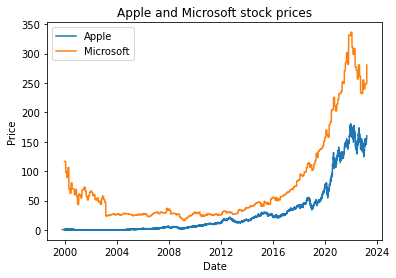

In [ ]:
import matplotlib.pyplot as plt
plt.plot(combined_data['close_apple'], label='Apple')
plt.plot(combined_data['close_msft'], label='Microsoft')
plt.legend()
plt.title("Apple and Microsoft stock prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

## Diagnosis

To diagnose the problem of joining time series with different frequencies, we can check the time indexes of the data sets. If the indexes are not aligned, the data sets will need to be resampled or interpolated to match the desired frequency.

## Damage Statement
The damage caused by joining time series with different frequencies can be incorrect or misleading analysis due to misalignment or missing data. If the data sets are not aligned correctly, the resulting analysis may be inaccurate, leading to poor investment decisions and increased risk.

## Suggested Model
To address the problem of joining time series with different frequencies, it is important to use a method that properly aligns the data sets while minimizing the loss of information. The choice of method will depend on the specific requirements of the analysis and the characteristics of the data. In general, upsampling or downsampling can be used to align the data sets, while interpolation can be used to estimate missing values. However, it is important to carefully consider the trade-offs between accuracy and loss of information when choosing a method.


# Unit Root Testing

Unit root testing is a method used to determine if a time series data has a unit root, which is a type of stochastic trend that can cause non-stationarity in the data. Non-stationarity refers to a property of a time series where statistical properties such as the mean and variance change over time.

Mathematically, we are assuming that the series follows an AR(p) process:

 $\nabla x_t = \gamma x_{t-1} + \sum_{i=2}^{p} \beta_i \nabla x_{t-i+1} + \upsilon_t $

and testing whether $\gamma \neq 0$; the null hypothesis $\gamma = 0$ says that the series has a unit root.

There are other versions of the test for models with a trend and drift.

In [ ]:
import requests
import pandas as pd
import re
import matplotlib.pyplot as plt
from arch.unitroot import ADF, KPSS

url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=META&outputsize=full&apikey=LIDXQ6GY1WVSIDYC'
r = requests.get(url)
data = r.json()
df = pd.DataFrame(data["Time Series (Daily)"])
df = df.T  # Transpose Dataframe for desired results
df = df.rename(columns=lambda x: re.sub('\d+\. *','',x))
df =  df.apply(lambda col:pd.to_numeric(col, errors='coerce'))
df.index = pd.to_datetime(df.index)
df.index.name="date"

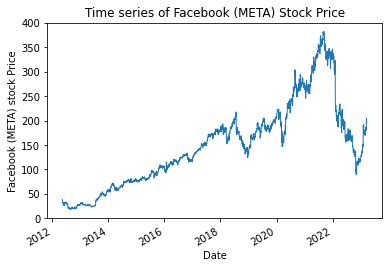

In [ ]:
df["adjusted close"].plot(
    linewidth=1,
    xlabel="Date",
    ylabel="Facebook (META) stock Price",
    title="Time series of Facebook (META) Stock Price",
)
plt.show()

As an example, we are going to perform a unit root test on the price of the SPY S&P 500 Exchange Traded Fund.  We have included a plot of the prices above.

Let's perform a Augmented Dickey-Fuller Unit Root test without trend or drift:

In [ ]:
adf_none = ADF(df["adjusted close"], trend="n", method="bic")
print("Augmented Dickey-Fuller Unit Root Test\n", adf_none.regression.summary())
print("\nTest statistics and critical values: \n", adf_none)

Augmented Dickey-Fuller Unit Root Test
                                  OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):              0.000
Method:                 Least Squares   F-statistic:                              1.299
Date:                Tue, 21 Mar 2023   Prob (F-statistic):                       0.254
Time:                        14:02:56   Log-Likelihood:                         -7783.6
No. Observations:                2725   AIC:                                  1.557e+04
Df Residuals:                    2724   BIC:                                  1.558e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-

Now let's try an ADF test with trend:

In [ ]:
adf_trend = ADF(df["adjusted close"], trend="ct", method="bic")
print("Augmented Dickey-Fuller Unit Root Test\n", adf_trend.regression.summary())
print("\nTest statistics and critical values: \n", adf_trend)

Augmented Dickey-Fuller Unit Root Test
                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     3.489
Date:                Tue, 21 Mar 2023   Prob (F-statistic):             0.0307
Time:                        14:03:56   Log-Likelihood:                -7780.5
No. Observations:                2725   AIC:                         1.557e+04
Df Residuals:                    2722   BIC:                         1.558e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Level.L1    

In both cases we get a p-value greater than 0.05.  Hence we fail to reject the hypothesis that the Facebook stock price time series contains a unit root, for both models. We can confirm that doing a KPSS test also indicates that the series is not trend stationary.

In [ ]:
print(KPSS(df["adjusted close"], trend="ct", lags=-1))

    KPSS Stationarity Test Results   
Test Statistic                  0.435
P-value                         0.000
Lags                               28
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: 0.22 (1%), 0.15 (5%), 0.12 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


## Diagnosis

A common method for conducting unit root tests is the Augmented Dickey-Fuller (ADF) test, which involves regressing the time series on its own lagged values, and then testing the null hypothesis of a unit root against the alternative hypothesis of stationarity.

## Damage
A unit root can lead to spurious regression, where two non-stationary time series may appear to be related, but in fact, they are not.

If a time series has a unit root, its future values are likely to be unpredictable and highly variable, which can lead to forecasting errors.

## Directions

To mitigate unit root issues, we can do various transforms to the data to make it stationary: for example, we can take differences, log differences, or try to subtract out a trend or seasonal component.  To see if a series can be made stationary after removing a trend we can use a Kwiatkowski-Phillips-Schmidt-Shin test.

We can also try to do this automatically by using a different model such as ARIMA, ARCH or GARCH.

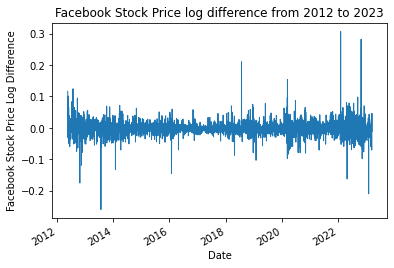

In [ ]:
import numpy as np
lfb = np.log(df["adjusted close"]).diff().dropna()
lfb.plot(
    linewidth=1,
    xlabel="Date",
    ylabel="Facebook Stock Price Log Difference",
    title="Facebook Stock Price log difference from 2012 to 2023",
)
plt.show()

In [ ]:
print("Facebook Stock Price Log Difference with no Drift no Trend")
print(ADF(lfb, trend="n", method="bic"))

Facebook Stock Price Log Difference with no Drift no Trend
   Augmented Dickey-Fuller Results   
Test Statistic                -52.921
P-value                         0.000
Lags                                0
-------------------------------------

Trend: No Trend
Critical Values: -2.57 (1%), -1.94 (5%), -1.62 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


After taking log differences, the ADF test indicates that we get a weakly stationary series. The ADF test works by estimating a regression equation


# Regime Change Models

Regime change models refer to statistical models that aim to capture changes in the underlying structure or behavior of a system over time. In financial markets, these changes can occur due to a variety of reasons such as changes in economic conditions, changes in monetary policy, or changes in market sentiment. Regime change models attempt to identify these changes and model them explicitly to improve the accuracy of financial forecasts.

Regime change models are used to capture changes in the behavior of financial markets over time. These changes can be abrupt and difficult to predict using traditional models, leading to inaccurate forecasts and increased risk for investors. Regime change models aim to improve the accuracy of forecasts by explicitly modeling these changes in behavior.




In [ ]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import requests
import re
from pandas_datareader.data import DataReader
from datetime import datetime

url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=SPY&outputsize=full&apikey=LIDXQ6GY1WVSIDYC'
r = requests.get(url)
data = r.json()
df = pd.DataFrame(data["Time Series (Daily)"])
df = df.T  # Transpose Dataframe for desired results
df = df.rename(columns=lambda x: re.sub('\d+\. *','',x))
df =  df.apply(lambda col:pd.to_numeric(col, errors='coerce'))
df.index = pd.to_datetime(df.index)
df.index.name="date"
df['return'] = np.log(df['adjusted close']).diff()


date
2023-03-24    395.750000
2023-03-23    393.170000
2023-03-22    392.110000
2023-03-21    398.910000
2023-03-20    393.740000
                 ...    
1999-11-05     89.722043
1999-11-04     88.847568
1999-11-03     88.176513
1999-11-02     87.586742
1999-11-01     88.217185
Name: adjusted close, Length: 5887, dtype: float64

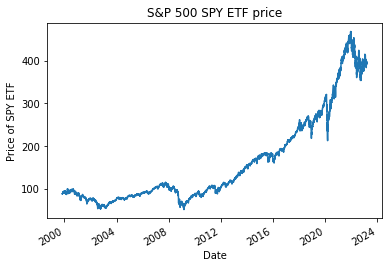

In [ ]:
df["adjusted close"].plot()
plt.title("S&P 500 SPY ETF price")
plt.ylabel("Price of SPY ETF")
plt.xlabel("Date")
df.dropna(inplace=True)

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


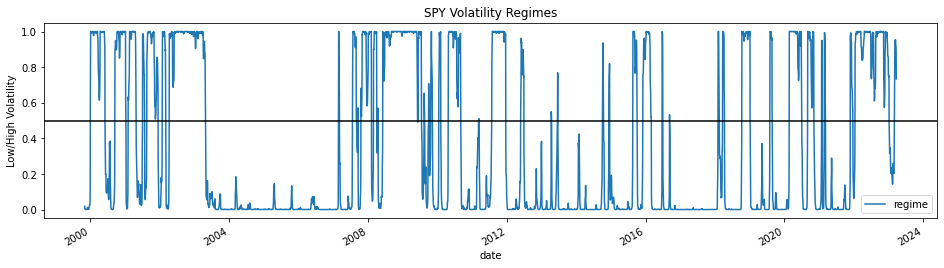

In [ ]:
model = sm.tsa.MarkovRegression(endog=df['return'],
                                k_regimes=2,
                                trend='c',
                                switching_variance=True) #

result = model.fit()

regime_probability = result.smoothed_marginal_probabilities[1].to_frame('regime')

regime_probability.plot(figsize=(16,4))

plt.title('SPY Volatility Regimes')

plt.axhline(.5, color='black')

plt.ylabel('Low/High Volatility')

plt.show()

We looked at the price of the SPDR S&P 500 ETF from 2000 to 2023.  We used a hidden Markov model to compute the probability of being in a low or high volatility regime.

## Diagnosis

Regime change models are typically used when traditional models fail to accurately predict financial market behavior. Signs that a regime change model may be appropriate include sudden changes in market conditions, changes in the behavior of financial instruments, or unexpected changes in asset prices.

## Damages

Failure to account for regime changes can lead to inaccurate forecasts and increased risk for investors. This can result in financial losses or missed opportunities.  For example, a regime change model used in the stock market may assume that market conditions will remain stable over a certain period of time. However, if a major economic event occurs, such as a recession or a change in government policy, this assumption may no longer hold true, and the model may fail to accurately predict future market performance.



## Directions

Regime change models can be used to improve the accuracy of financial forecasts by explicitly modeling changes in market behavior. Other models that may be useful in this context include state-space models, structural break models, and time-varying parameter models. It's important to carefully evaluate the appropriateness of each model for the specific market conditions and data being analyzed.


# Feature Extraction

Feature extraction is a process of selecting and transforming raw data into a set of meaningful features that can be used as inputs for machine learning algorithms. The process involves identifying relevant patterns, reducing the dimensionality of the data, and creating new features based on domain knowledge. Some common techniques for feature extraction include principal component analysis (PCA), independent component analysis (ICA), and Fourier transforms. Principal component analysis selects features based on the eigenvalues and eigenvectors of the correlation matrix; the selected features are linear combinations of the original features.


In many applications, the raw data can be too complex or high-dimensional to be used directly for analysis or modeling. Feature extraction involves identifying and selecting relevant information from the data, transforming it into a format that is more amenable for analysis, and creating new features that capture important patterns. This process can help to reduce the dimensionality of the data, remove noise or redundancy, and improve the performance of machine learning algorithms.
For example, in image processing, feature extraction techniques can be used to identify important visual patterns such as edges, corners, and textures. In natural language processing, feature extraction can involve converting text into a vector representation based on word frequency or other linguistic features.

## Demonstration

Here is an example of feature extraction using the famous iris dataset in Python:

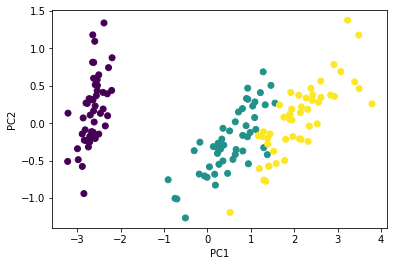

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

# Load the iris dataset
iris = load_iris()

# Convert the data into a pandas dataframe
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Perform PCA to extract the principal components
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_df)

# Plot the results
import matplotlib.pyplot as plt
plt.scatter(iris_pca[:,0], iris_pca[:,1], c=iris.target)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In this example, we load the iris dataset, which consists of four features (sepal length, sepal width, petal length, and petal width) for 150 samples of three different species of iris. We then perform principal component analysis (PCA) to extract the two most important components that capture the majority of the variance in the data. Finally, we plot the results using a scatterplot, where each point corresponds to a sample of the iris dataset, colored by the species.

## Diagnosis
The need for feature extraction arises when the raw data is too complex or high-dimensional to be used directly for analysis or modeling. This can manifest as poor performance of machine learning algorithms, high computational costs, or difficulty in interpreting the results. One way to diagnose this problem is to compare the performance of different machine learning algorithms on the raw data versus the extracted features.

## Damage
Failure to perform feature extraction when necessary can lead to poor performance of machine learning algorithms, high computational costs, or difficulty in interpreting the results. In some cases, it may even result in incorrect or misleading conclusions.

## Directions
There are many techniques for feature extraction, each with their own strengths and weaknesses. Some common techniques include PCA, ICA, Fourier transforms, and wavelet transforms. The choice of technique depends on the nature of the data and the goals of the analysis. It is often useful to try several different techniques and compare their performance